In [1]:
import tensorflow as tf
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
import keras
keras.__version__

/home/deeplearn/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


'2.0.8'

In [2]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

In [3]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [4]:
# # Create smaller dataset for Dogs vs. Cats
# import os, shutil

# original_dataset_dir = '/home/deeplearn/deepfun/keras/train/'

# base_dir = '/home/deeplearn/deepfun/keras/data'
# if not os.path.exists(base_dir):
#     os.mkdir(base_dir)

# # Create directories
# train_dir = os.path.join(base_dir,'train')
# if not os.path.exists(train_dir):
#     os.mkdir(train_dir)
# validation_dir = os.path.join(base_dir,'validation')
# if not os.path.exists(validation_dir):
#     os.mkdir(validation_dir)
# test_dir = os.path.join(base_dir,'test')
# if not os.path.exists(test_dir):
#     os.mkdir(test_dir)

# train_cats_dir = os.path.join(train_dir,'cats')
# if not os.path.exists(train_cats_dir):
#     os.mkdir(train_cats_dir)

# train_dogs_dir = os.path.join(train_dir,'dogs')
# if not os.path.exists(train_dogs_dir):
#     os.mkdir(train_dogs_dir)

# validation_cats_dir = os.path.join(validation_dir,'cats')
# if not os.path.exists(validation_cats_dir):
#     os.mkdir(validation_cats_dir)

# validation_dogs_dir = os.path.join(validation_dir, 'dogs')
# if not os.path.exists(validation_dogs_dir):
#     os.mkdir(validation_dogs_dir)

# test_cats_dir = os.path.join(test_dir, 'cats')     
# if not os.path.exists(test_cats_dir):
#     os.mkdir(test_cats_dir)

# test_dogs_dir = os.path.join(test_dir, 'dogs')
# if not os.path.exists(test_dogs_dir):
#     os.mkdir(test_dogs_dir)

# # Copy first 1000 cat images to train_cats_dir
# fnames = ['cat.{}.jpg'.format(i) for i in range(0, 1000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(train_cats_dir, fname)
#     shutil.copyfile(src, dst)
    
# # Copy next 500 cat images to validation_cats_dir
# fnames = ['cat.{}.jpg'.format(i) for i in range(1001, 1501)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(validation_cats_dir, fname)
#     shutil.copyfile(src, dst)
    
# # Copy next 500 cat images to test_cats_dir
# fnames = ['cat.{}.jpg'.format(i) for i in range(1502,2002)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(test_cats_dir, fname)
#     shutil.copyfile(src, dst)
    
# # Copy first 1000 dog images to train_dogs_dir
# fnames = ['dog.{}.jpg'.format(i) for i in range(0,1000)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(train_dogs_dir, fname)
#     shutil.copyfile(src, dst)
                                                
# # Copy next 500 dog images to validation_dogs_dir
# fnames = ['dog.{}.jpg'.format(i) for i in range(1001,1501)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(validation_dogs_dir, fname)
#     shutil.copyfile(src, dst)

# # Copy next 500 dog images to test_dogs_dir
# fnames = ['dog.{}.jpg'.format(i) for i in range(1502,2002)]
# for fname in fnames:
#     src = os.path.join(original_dataset_dir, fname)
#     dst = os.path.join(test_dogs_dir, fname)
#     shutil.copyfile(src, dst)
                                                
# # Sanity checks
# print('total training cat images:', len(os.listdir(train_cats_dir)))
# print('total training dog images:', len(os.listdir(train_dogs_dir)))
# print('total validation cat images:', len(os.listdir(validation_cats_dir)))
# print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
# print('total test cat images:', len(os.listdir(test_cats_dir)))
# # print('total test dog images:', len(os.listdir(test_dogs_dir)))

In [5]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = '/home/deeplearn/deepfun/keras/data'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [7]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 0s - loss: 0.6131 - acc: 0.6510 - val_loss: 0.4542 - val_acc: 0.8430
Epoch 2/30
2000/2000 [==============================] - 0s - loss: 0.4315 - acc: 0.8095 - val_loss: 0.3710 - val_acc: 0.8580
Epoch 3/30
2000/2000 [==============================] - 0s - loss: 0.3558 - acc: 0.8455 - val_loss: 0.3291 - val_acc: 0.8820
Epoch 4/30
2000/2000 [==============================] - 0s - loss: 0.3320 - acc: 0.8515 - val_loss: 0.3079 - val_acc: 0.8760
Epoch 5/30
2000/2000 [==============================] - 0s - loss: 0.2936 - acc: 0.8745 - val_loss: 0.2916 - val_acc: 0.8940
Epoch 6/30
2000/2000 [==============================] - 0s - loss: 0.2664 - acc: 0.8965 - val_loss: 0.2776 - val_acc: 0.8950
Epoch 7/30
2000/2000 [==============================] - 0s - loss: 0.2532 - acc: 0.9050 - val_loss: 0.2680 - val_acc: 0.8960
Epoc

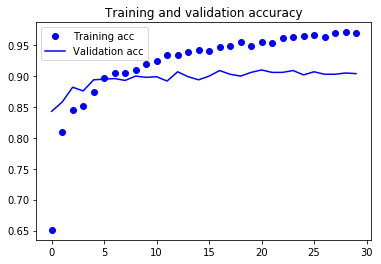

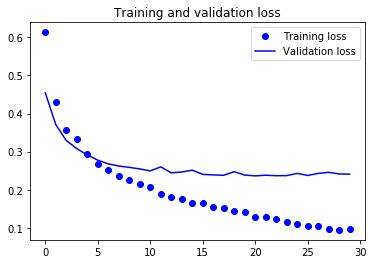

In [8]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [9]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [11]:
# lets Freeze the pre-trained conv layer
print('These are the # of trainable weights before freezing the conv base: ', len(model.trainable_weights))

These are the # of trainable weights before freezing the conv base:  30


In [12]:
conv_base.trainable = False

In [13]:
print('These are the # of trainable weights before freezing the conv base: ', len(model.trainable_weights))

These are the # of trainable weights before freezing the conv base:  4


In [14]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
train_generator,
steps_per_epoch = 100,
epochs = 30,
validation_data = validation_generator,
validation_steps = 50,
verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
16s - loss: 0.5271 - acc: 0.7280 - val_loss: 0.5908 - val_acc: 0.7270
Epoch 2/30
15s - loss: 0.3292 - acc: 0.8630 - val_loss: 0.1750 - val_acc: 0.9270
Epoch 3/30
15s - loss: 0.2515 - acc: 0.8925 - val_loss: 0.1206 - val_acc: 0.9480
Epoch 4/30
15s - loss: 0.1917 - acc: 0.9225 - val_loss: 0.1916 - val_acc: 0.9090
Epoch 5/30
15s - loss: 0.1660 - acc: 0.9325 - val_loss: 0.1176 - val_acc: 0.9510
Epoch 6/30
15s - loss: 0.1469 - acc: 0.9415 - val_loss: 0.1144 - val_acc: 0.9520
Epoch 7/30
15s - loss: 0.1220 - acc: 0.9515 - val_loss: 0.1198 - val_acc: 0.9510
Epoch 8/30
15s - loss: 0.1206 - acc: 0.9550 - val_loss: 0.0910 - val_acc: 0.9700
Epoch 9/30
15s - loss: 0.1261 - acc: 0.9535 - val_loss: 0.0794 - val_acc: 0.9750
Epoch 10/30
15s - loss: 0.0976 - acc: 0.9695 - val_loss: 0.1037 - val_acc: 0.9620
Epoch 11/30
15s - loss: 0.0875 - acc: 0.9630 - val_loss: 0.1136 - val_acc: 0.9600
Epoch 12/30
15s - loss:

In [15]:
model.save('cats_dogs_mymodel_1.h5')

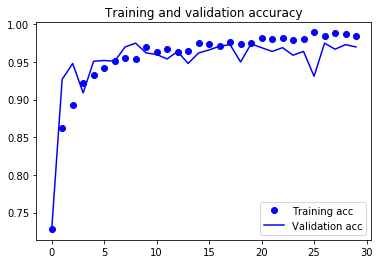

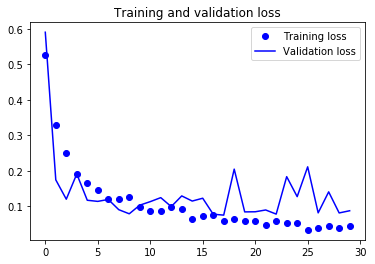

In [16]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [17]:
# Fine Tuning
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [18]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False


In [20]:
model.compile(loss='binary_crossentropy',
             optimizer = optimizers.Adam(lr=1e-5),
             metrics = ['acc'])
history = model.fit_generator(
train_generator,
steps_per_epoch = 100,
epochs = 100,
validation_data = validation_generator,
validation_steps = 50)

Epoch 1/100
100/100 [==============================] - 9s - loss: 0.0140 - acc: 0.9955 - val_loss: 0.1094 - val_acc: 0.9730
Epoch 2/100
100/100 [==============================] - 8s - loss: 0.0156 - acc: 0.9950 - val_loss: 0.1133 - val_acc: 0.9610
Epoch 3/100
100/100 [==============================] - 8s - loss: 0.0208 - acc: 0.9935 - val_loss: 0.1044 - val_acc: 0.9690
Epoch 4/100
100/100 [==============================] - 8s - loss: 0.0114 - acc: 0.9970 - val_loss: 0.0821 - val_acc: 0.9680
Epoch 5/100
100/100 [==============================] - 8s - loss: 0.0147 - acc: 0.9965 - val_loss: 0.0722 - val_acc: 0.9800
Epoch 6/100
100/100 [==============================] - 8s - loss: 0.0078 - acc: 0.9990 - val_loss: 0.1289 - val_acc: 0.9680
Epoch 7/100
100/100 [==============================] - 8s - loss: 0.0100 - acc: 0.9950 - val_loss: 0.1034 - val_acc: 0.9720
Epoch 8/100
100/100 [==============================] - 8s - loss: 0.0088 - acc: 0.9975 - val_loss: 0.0665 - val_acc: 0.9820
Epoch 9/

In [21]:
model.save('cats_dogs_mymodel_finetuned_1.h5')

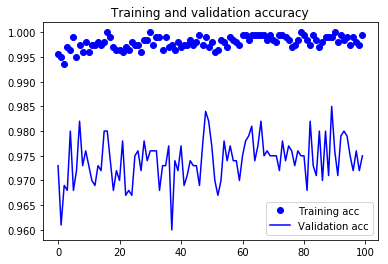

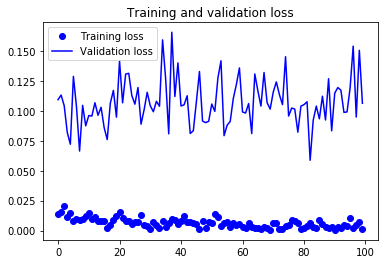

In [22]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

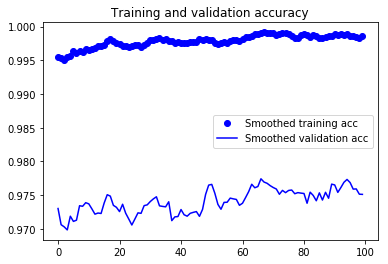

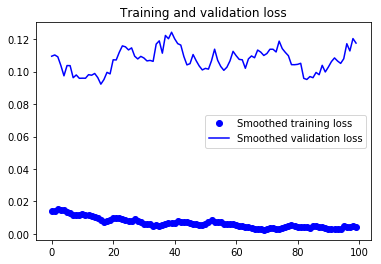

In [23]:
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
    if smoothed_points:
        previous = smoothed_points[-1]
        smoothed_points.append(previous * factor + point * (1 - factor))
    else:
        smoothed_points.append(point)
        return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [24]:
test_generator = test_datagen.flow_from_directory(
test_dir,
target_size = (150, 150),
batch_size = 20,
class_mode = 'binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps = 50)
print('accuray is :', test_acc)

Found 1000 images belonging to 2 classes.
accuray is : 0.9689999949932099
